In [3]:
pip install resampy

In [4]:
from google.colab import drive
drive.mount('/content/drive')

import os

Mounted at /content/drive


In [5]:
print(os.getcwd())

/content


In [6]:
data_path = '/content/drive/MyDrive/Y3.1/DST/machine-sound-data'
print(os.listdir(data_path))

['train', 'val', '.ipynb_checkpoints', 'test']


In [7]:
filelist = os.listdir(data_path)

for filename in filelist:
  print(filename)

train
val
.ipynb_checkpoints
test


In [8]:
%matplotlib inline

from pathlib import Path
import numpy as np
import matplotlib.pyplot as plt
import sklearn
from tensorflow.keras.utils import to_categorical
#from sklearn.model_selection import train_test_split

In [9]:
from pickle import dump
from pickle import load

In [10]:
train_data = data_path+"/train"
os.listdir(train_data)

['n_00000004_0.wav',
 'n_00000003_0.wav',
 'n_00000000_5000.wav',
 'n_00000001_0.wav',
 'n_00000001_5000.wav',
 'n_00000002_0.wav',
 'n_00000002_5000.wav',
 'n_00000005_0.wav',
 'n_00000005_5000.wav',
 'n_00000007_0.wav',
 'n_00000007_5000.wav',
 'n_00000010_5000.wav',
 'n_00000008_0.wav',
 'n_00000008_5000.wav',
 'n_00000017_0.wav',
 'n_00000017_5000.wav',
 'n_00000011_5000.wav',
 'n_00000013_5000.wav',
 'n_00000016_0.wav',
 'n_00000016_5000.wav',
 'n_00000015_0.wav',
 'n_00000014_0.wav',
 'n_00000012_0.wav',
 'n_00000012_5000.wav',
 'n_00000021_0.wav',
 'n_00000021_5000.wav',
 'n_00000019_5000.wav',
 'n_00000020_0.wav',
 'n_00000023_0.wav',
 'n_00000022_0.wav',
 'n_00000018_5000.wav',
 'n_00000024_0.wav',
 'n_00000024_5000.wav',
 'n_00000025_5000.wav',
 'n_00000030_0.wav',
 'n_00000026_0.wav',
 'n_00000027_0.wav',
 'n_00000029_0.wav',
 'n_00000029_5000.wav',
 'n_00000031_0.wav',
 'n_00000031_5000.wav',
 'n_00000037_5000.wav',
 'n_00000032_0.wav',
 'n_00000038_0.wav',
 'n_00000038_500

In [11]:
val_data = data_path+"/val"
os.listdir(val_data)

['n_00000009_5000.wav',
 'n_00000010_0.wav',
 'n_00000025_0.wav',
 'n_00000030_5000.wav',
 'n_00000026_5000.wav',
 'n_00000027_5000.wav',
 'n_00000028_5000.wav',
 'n_00000037_0.wav',
 'n_00000032_5000.wav',
 'n_00000043_0.wav',
 'n_00000046_0.wav',
 'n_00000050_5000.wav',
 'n_00000052_0.wav',
 'n_00000061_5000.wav',
 'n_00000060_0.wav',
 'n_00000072_0.wav',
 'n_00000078_5000.wav',
 'n_00000076_5000.wav',
 'n_00000075_5000.wav',
 'n_00000085_5000.wav',
 'n_00000081_0.wav',
 'n_00000090_0.wav',
 'n_00000092_5000.wav',
 'n_00000087_0.wav',
 'n_00000099_5000.wav',
 'n_00000098_0.wav',
 'n_00000105_5000.wav',
 'n_00000110_5000.wav',
 'n_00000109_0.wav',
 'n_00000108_5000.wav',
 'n_00000115_0.wav',
 'n_00000117_5000.wav',
 'n_00000128_0.wav',
 'n_00000128_5000.wav',
 'n_00000130_5000.wav',
 'n_00000134_0.wav',
 'n_00000136_5000.wav',
 'n_00000140_0.wav',
 'n_00000141_0.wav',
 'n_00000137_0.wav',
 'n_00000149_5000.wav',
 'n_00000146_0.wav',
 'n_00000145_0.wav',
 'n_00000148_0.wav',
 'n_000001

In [12]:
test_data = data_path+"/test"
os.listdir(test_data)

['n_00000004_5000.wav',
 'n_00000003_5000.wav',
 'n_00000000_0.wav',
 'n_00000009_0.wav',
 'n_00000006_0.wav',
 'n_00000006_5000.wav',
 'n_00000011_0.wav',
 'n_00000013_0.wav',
 'n_00000015_5000.wav',
 'n_00000014_5000.wav',
 'n_00000019_0.wav',
 'n_00000020_5000.wav',
 'n_00000023_5000.wav',
 'n_00000022_5000.wav',
 'n_00000018_0.wav',
 'n_00000028_0.wav',
 'n_00000034_0.wav',
 'n_00000043_5000.wav',
 'n_00000039_5000.wav',
 'n_00000044_0.wav',
 'n_00000049_5000.wav',
 'n_00000052_5000.wav',
 'n_00000055_0.wav',
 'n_00000055_5000.wav',
 'n_00000053_0.wav',
 'n_00000062_0.wav',
 'n_00000065_5000.wav',
 'n_00000064_5000.wav',
 'n_00000063_5000.wav',
 'n_00000067_0.wav',
 'n_00000067_5000.wav',
 'n_00000071_5000.wav',
 'n_00000066_0.wav',
 'n_00000066_5000.wav',
 'n_00000079_0.wav',
 'n_00000079_5000.wav',
 'n_00000077_0.wav',
 'n_00000085_0.wav',
 'n_00000083_5000.wav',
 'n_00000082_0.wav',
 'n_00000086_5000.wav',
 'n_00000080_0.wav',
 'n_00000088_0.wav',
 'n_00000097_5000.wav',
 'n_000

In [13]:
normal_train = train_data+"/n_*.wav"
abnormal_train = train_data+"/a_*.wav"

In [14]:
normal_train

'/content/drive/MyDrive/Y3.1/DST/machine-sound-data/train/n_*.wav'

In [15]:
normal_val = val_data+"/n_*.wav"
abnormal_val = val_data+"/a_*.wav"

In [16]:
import librosa
import librosa.display

In [18]:
import glob

normal_train_signals = [
    librosa.load(p)[0] for p in glob.glob(normal_train)
]

abnormal_train_signals = [
    librosa.load(p)[0] for p in glob.glob(abnormal_train)
]

normal_val_signals = [
    librosa.load(p)[0] for p in glob.glob(normal_val)
]

abnormal_val_signals = [
    librosa.load(p)[0] for p in glob.glob(abnormal_val)
]

In [19]:
print("Shape of normal_train_signals:", np.array(normal_train_signals, dtype=object).shape)
print("Shape of abnormal_train_signals:", np.array(abnormal_train_signals, dtype=object).shape)
print("Shape of normal_val_signals:", np.array(normal_val_signals, dtype=object).shape)
print("Shape of abnormal_val_signals:", np.array(abnormal_val_signals, dtype=object).shape)

Shape of normal_train_signals: (489, 110250)
Shape of abnormal_train_signals: (175, 110250)
Shape of normal_val_signals: (119, 110250)
Shape of abnormal_val_signals: (47, 110250)


In [20]:
def save_dataset(dataset, filename):
    dump(dataset, open(filename, 'wb'))
    print('Saved: %s' % filename)

In [21]:
datasetFile = 'coffee_train.pkl'
save_dataset([normal_train_signals, abnormal_train_signals], datasetFile)

Saved: coffee_train.pkl


In [22]:
 datasetFile_val = 'coffee_val.pkl'
save_dataset([normal_val_signals, abnormal_val_signals], datasetFile_val)

Saved: coffee_val.pkl


In [23]:
def load_dataset(filename):
    return load(open(filename, 'rb'))

[normal_train_signals, abnormal_train_signals] = load_dataset(datasetFile)

In [24]:
len(normal_train_signals), len(abnormal_train_signals)

(489, 175)

In [25]:
[normal_val_signals, abnormal_val_signals] = load_dataset(datasetFile_val)

In [26]:
len(normal_val_signals), len(abnormal_val_signals)

(119, 47)

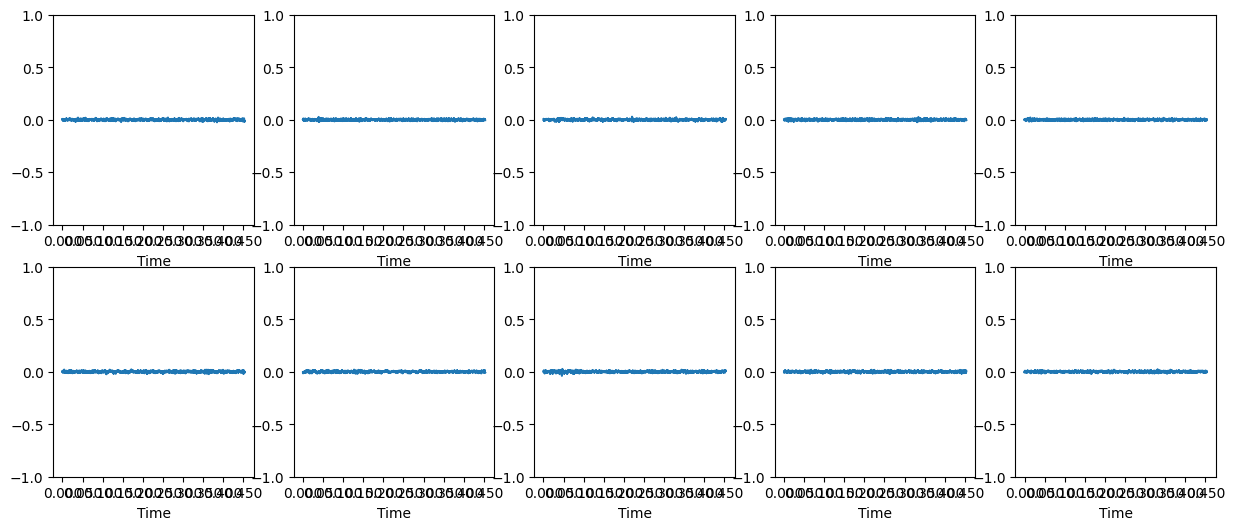

In [27]:
plt.figure(figsize=(15, 6))
for i, x in enumerate(normal_train_signals[:10]):
    plt.subplot(2, 5, i+1)
    librosa.display.waveshow(x[:10000])
    plt.ylim(-1, 1)

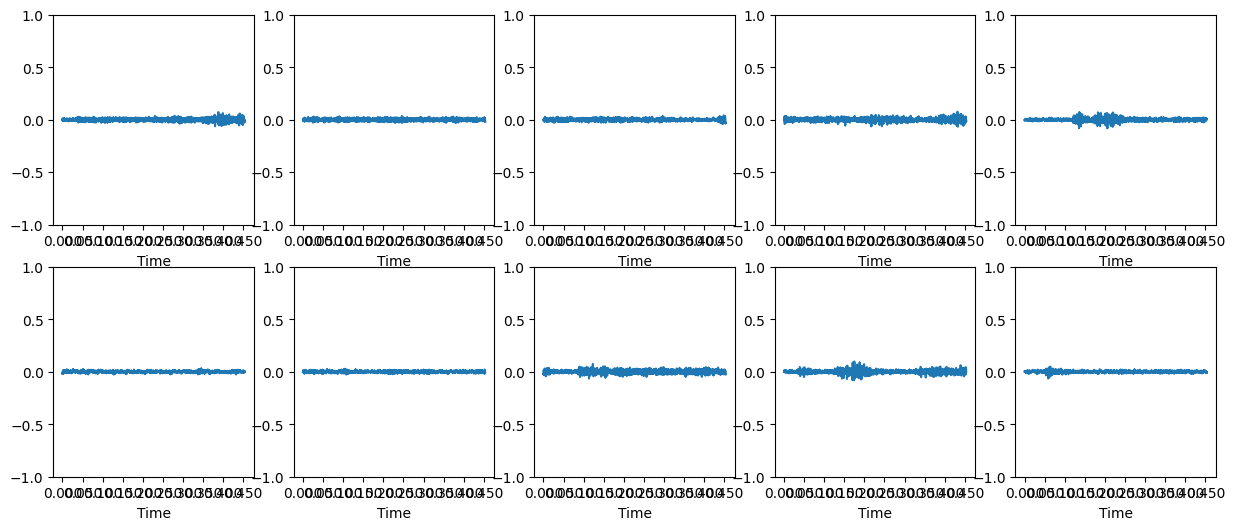

In [28]:
plt.figure(figsize=(15, 6))
for i, x in enumerate(abnormal_train_signals[:10]):
    plt.subplot(2, 5, i+1)
    librosa.display.waveshow(x[:10000])
    plt.ylim(-1, 1)

In [29]:
def extract_features(signal):
    return [
        librosa.feature.zero_crossing_rate(signal)[0, 0],
        librosa.feature.spectral_centroid(y=signal)[0, 0],
    ]

In [30]:
normal_train_features = np.array([extract_features(x) for x in normal_train_signals])
abnormal_train_features = np.array([extract_features(x) for x in abnormal_train_signals])

In [31]:
normal_val_features = np.array([extract_features(x) for x in normal_val_signals])
abnormal_val_features = np.array([extract_features(x) for x in abnormal_val_signals])

In [32]:
print(normal_train_features.shape)
print(abnormal_train_features.shape)
print(normal_val_features.shape)
print(abnormal_val_features.shape)

(489, 2)
(175, 2)
(119, 2)
(47, 2)


In [33]:
print(normal_train_features[10])
print(abnormal_train_features[10])
print(normal_val_features[10])
print(abnormal_val_features[10])

[4.29687500e-02 1.90580011e+03]
[2.49023438e-02 1.36677989e+03]
[5.66406250e-02 2.03547435e+03]
[4.00390625e-02 1.54595507e+03]


Text(0, 0.5, 'Count')

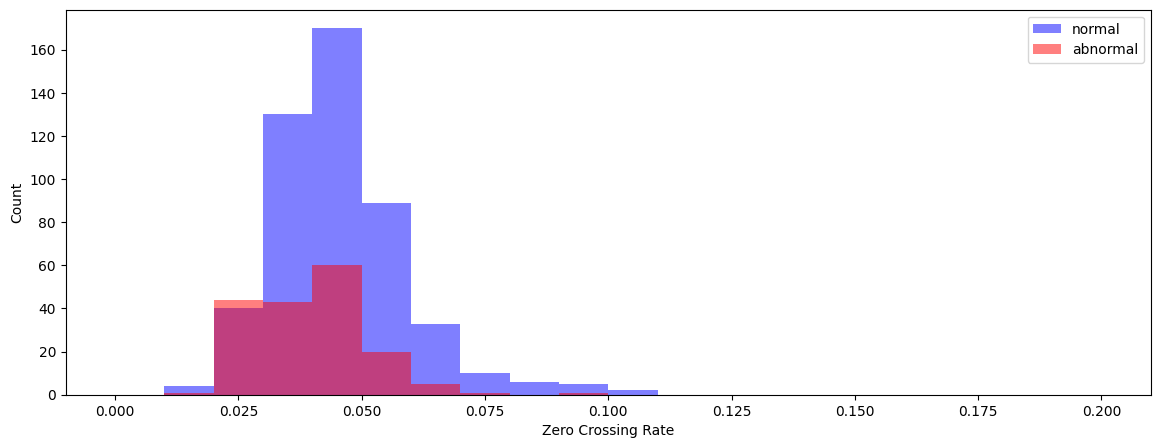

In [34]:
plt.figure(figsize=(14, 5))
plt.hist(normal_train_features[:,0], color='b', range=(0, 0.2), alpha=0.5, bins=20)
plt.hist(abnormal_train_features[:,0], color='r', range=(0, 0.2), alpha=0.5, bins=20)
plt.legend(('normal', 'abnormal'))
plt.xlabel('Zero Crossing Rate')
plt.ylabel('Count')

Text(0, 0.5, 'Count')

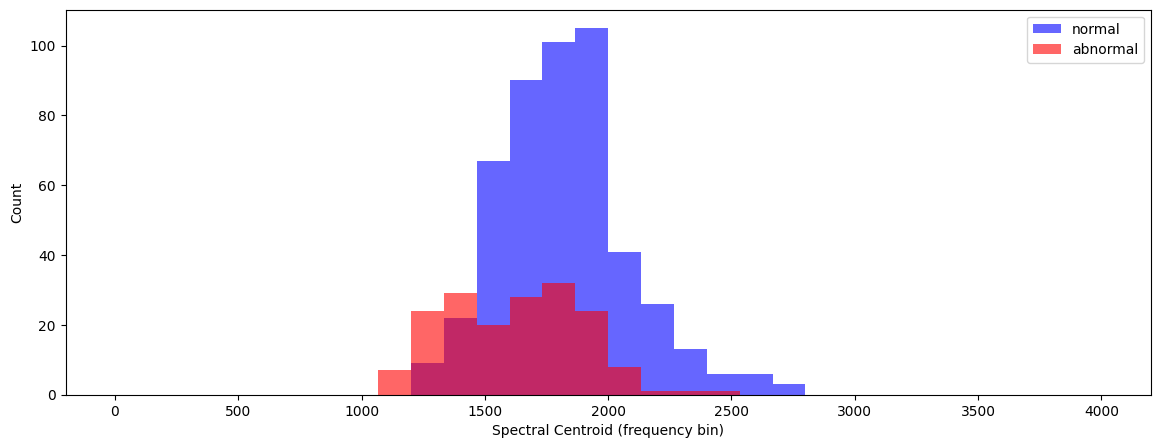

In [35]:
plt.figure(figsize=(14, 5))
plt.hist(normal_train_features[:,1], color='b', range=(0, 4000), bins=30, alpha=0.6)
plt.hist(abnormal_train_features[:,1], color='r', range=(0, 4000), bins=30, alpha=0.6)
plt.legend(('normal', 'abnormal'))
plt.xlabel('Spectral Centroid (frequency bin)')
plt.ylabel('Count')

In [36]:
feature_train_table = np.vstack((normal_train_features, abnormal_train_features))
print(feature_train_table.shape)

(664, 2)


In [37]:
feature_val_table = np.vstack((normal_val_features, abnormal_val_features))
print(feature_val_table.shape)

(166, 2)


In [38]:
scaler = sklearn.preprocessing.MinMaxScaler(feature_range=(-1, 1))
training_features = scaler.fit_transform(feature_train_table)
print(training_features.min(axis=0))
print(training_features.max(axis=0))

[-1. -1.]
[1. 1.]


In [39]:
scaler = sklearn.preprocessing.MinMaxScaler(feature_range=(-1, 1))
val_features = scaler.fit_transform(feature_val_table)
print(val_features.min(axis=0))
print(val_features.max(axis=0))

[-1. -1.]
[1. 1.]


Text(0, 0.5, 'Spectral Centroid')

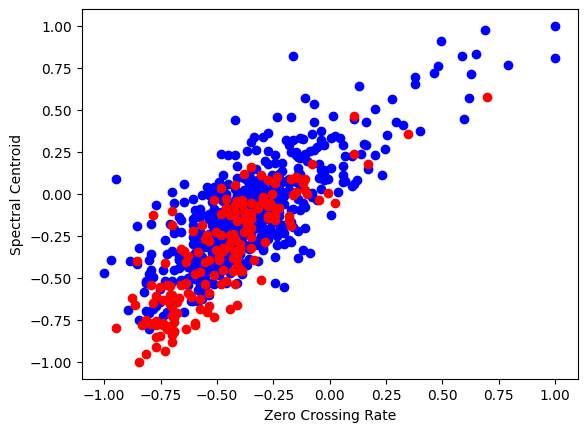

In [40]:
plt.scatter(training_features[:489,0], training_features[:489,1], c='b')
plt.scatter(training_features[489:,0], training_features[489:,1], c='r')
plt.xlabel('Zero Crossing Rate')
plt.ylabel('Spectral Centroid')

In [41]:
y_train_total = [0 for i in range(489)] + [1 for i in range(175)]
y_val_total = [0 for i in range(119)] + [1 for i in range(47)]

In [42]:
y_train_encoded = to_categorical(y_train_total)
y_val_encoded = to_categorical(y_val_total)

In [43]:
y_train_encoded[:10]

array([[1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.]])

In [44]:
x_train = training_features
y_train = y_train_encoded
x_val = val_features
y_val = y_val_encoded

In [45]:
x_train.shape, y_train.shape

((664, 2), (664, 2))

In [46]:
x_val.shape, y_val.shape

((166, 2), (166, 2))

In [47]:
from tensorflow.keras.models import Model
from tensorflow.keras.models import Sequential

from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Activation
from tensorflow.keras.layers import LeakyReLU
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Input

In [48]:
def create_model():
    model = Sequential()
    model.add(Input(shape=(2,)))
    model.add(Dense(8))
    model.add(LeakyReLU(negative_slope=0.1))
    model.add(Dropout(0.2))
    model.add(Dense(2, activation='softmax'))
    return model

In [49]:
model = create_model()
model.summary()
adam_optim = Adam(learning_rate=0.0001)
model.compile(optimizer=adam_optim, loss='categorical_crossentropy', metrics=['accuracy'])

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 8)              │            24 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu (LeakyReLU)         │ (None, 8)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 8)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 2)              │            18 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 42 (168.00 B)

 Trainable params: 42 (168.00 B)

 Non-trainable params: 0 (0.00 B)

In [50]:
his = model.fit(
    x_train,
    y_train,
    batch_size=1,
    epochs=100,
    verbose=1,
    validation_data = (x_val, y_val)
)

Epoch 1/100
664/664 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.4858 - loss: 0.6911 - val_accuracy: 0.5542 - val_loss: 0.6838
Epoch 2/100
664/664 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.6415 - loss: 0.6615 - val_accuracy: 0.7169 - val_loss: 0.6536
Epoch 3/100
664/664 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7321 - loss: 0.6356 - val_accuracy: 0.7169 - val_loss: 0.6291
Epoch 4/100
664/664 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.7181 - loss: 0.6203 - val_accuracy: 0.7169 - val_loss: 0.6112
Epoch 5/100
664/664 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7474 - loss: 0.5856 - val_accuracy: 0.7169 - val_loss: 0.5995
Epoch 6/100
664/664 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7306 - loss: 0.5826 - val_accuracy: 0.7169 - val_loss: 0.5916
Epoch 7/100
664/664 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.7213 - loss: 0.5797 - val_accuracy: 0.7169 - val_loss: 0.5866
Epoch 8/100
664/664 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.7262 - loss: 0.5717 - val_accu

In [51]:
import plotly
import plotly.graph_objs as go

In [52]:
h1 = go.Scatter(y=his.history['loss'],
                    mode="lines", line=dict(
                    width=2,
                    color='blue'),
                    name="loss"
                   )
h2 = go.Scatter(y=his.history['val_loss'],
                    mode="lines", line=dict(
                    width=2,
                    color='red'),
                    name="val_loss"
                   )

data = [h1,h2]
layout1 = go.Layout(title='Loss',
                   xaxis=dict(title='epochs'),
                   yaxis=dict(title='', range=[0, 1]))
fig1 = go.Figure(data = data, layout=layout1)
fig1.show()

In [53]:
h1 = go.Scatter(y=his.history['accuracy'],
                    mode="lines", line=dict(
                    width=2,
                    color='blue'),
                    name="acc"
                   )
h2 = go.Scatter(y=his.history['val_accuracy'],
                    mode="lines", line=dict(
                    width=2,
                    color='red'),
                    name="val_acc"
                   )

data = [h1,h2]
layout1 = go.Layout(title='Accuracy',
                   xaxis=dict(title='epochs'),
                   yaxis=dict(title='',range=[0, 1]))
fig2 = go.Figure(data = data, layout=layout1)
fig2.show()

# **CNN Model**

In [55]:
from tensorflow.keras.models import Model
from tensorflow.keras.models import Sequential

from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Activation
from tensorflow.keras.layers import LeakyReLU
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Conv2D

from tensorflow.keras.layers import GlobalAveragePooling2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.optimizers import Adam

In [56]:
file_name = '/content/drive/MyDrive/Y3.1/DST/machine-sound-data/train/a_00000004_5000.wav'
audio, sample_rate = librosa.load(file_name, res_type='kaiser_fast')

print(audio.shape, sample_rate)

mfccs = librosa.feature.mfcc(y=audio, sr=sample_rate, n_mfcc=40)
print(mfccs.shape)

(110250,) 22050
(40, 216)


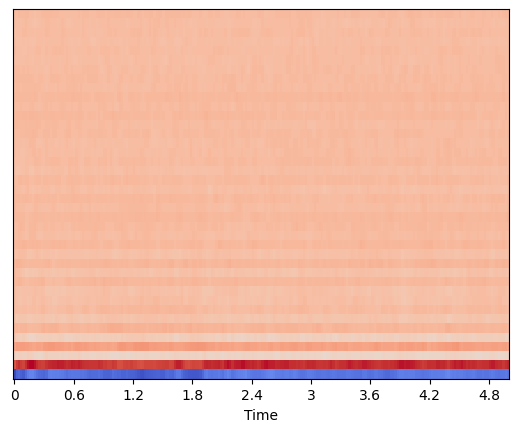

In [57]:
librosa.display.specshow(mfccs, sr=sample_rate, x_axis='time')

In [58]:
max_pad_len = 100

def extract_features(file_name):
    audio, sample_rate = librosa.load(file_name, res_type='kaiser_fast')
    mfccs = librosa.feature.mfcc(y=audio, sr=sample_rate, n_mfcc=40)
    pad_width = max_pad_len - mfccs.shape[1]
    mfccs = np.pad(mfccs, pad_width=((0, 0), (0, max(0, pad_width))), mode='constant')
    return mfccs

In [59]:
normal_train_features = []
for file_name in glob.glob(normal_train):
    data = extract_features(file_name)
    normal_train_features.append(data)

abnormal_train_features = []
for file_name in glob.glob(abnormal_train):
    data = extract_features(file_name)
    abnormal_train_features.append(data)

normal_val_features = []
for file_name in glob.glob(normal_val):
    data = extract_features(file_name)
    normal_val_features.append(data)

abnormal_val_features = []
for file_name in glob.glob(abnormal_val):
    data = extract_features(file_name)
    abnormal_val_features.append(data)

In [60]:
normal_train_features[0].shape

(40, 216)

In [61]:
feature_train_table = np.vstack((normal_train_features, abnormal_train_features))
print(feature_train_table.shape)

(664, 40, 216)


In [62]:
feature_train_table = feature_train_table.reshape(feature_train_table.shape[0], feature_train_table.shape[1], feature_train_table.shape[2], 1)
print(feature_train_table.shape)

(664, 40, 216, 1)


In [63]:
y_train_encoded[:10]

array([[1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.]])

In [64]:
feature_val_table = np.vstack((normal_val_features, abnormal_val_features))

In [65]:
feature_val_table = feature_val_table.reshape(feature_val_table.shape[0], feature_val_table.shape[1], feature_val_table.shape[2], 1)
print(feature_val_table.shape)

(166, 40, 216, 1)


In [66]:
x_train = feature_train_table
x_val = feature_val_table
y_train = y_train_encoded
y_val = y_val_encoded

In [67]:
x_train.shape, x_val.shape, y_train.shape, y_val.shape

((664, 40, 216, 1), (166, 40, 216, 1), (664, 2), (166, 2))

In [68]:
num_rows = 40
num_columns = 216
num_channels = 1
num_batch_size = 64
epochs = 50

In [69]:
model = Sequential()
model.add(Input(shape=(num_rows, num_columns, num_channels)))
model.add(Conv2D(filters=16, kernel_size=2, activation='relu'))
model.add(MaxPooling2D(pool_size=2))
model.add(Dropout(0.2))

model.add(Conv2D(filters=32, kernel_size=2, activation='relu'))
model.add(MaxPooling2D(pool_size=2))
model.add(Dropout(0.2))

model.add(Conv2D(filters=64, kernel_size=2, activation='relu'))
model.add(MaxPooling2D(pool_size=2))
model.add(Dropout(0.2))

model.add(Conv2D(filters=128, kernel_size=2, activation='relu'))
model.add(MaxPooling2D(pool_size=2))
model.add(Dropout(0.2))
model.add(GlobalAveragePooling2D())

model.add(Dense(2, activation='softmax'))

In [70]:
model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer='adam')

In [71]:
from tensorflow.keras.callbacks import ModelCheckpoint

checkpoint = ModelCheckpoint('best_model.keras', monitor='val_loss', verbose=1, save_best_only=True, mode='min')

In [79]:
his = model.fit(x_train, y_train, batch_size=num_batch_size, epochs=epochs, validation_data=(x_val, y_val), verbose=1, callbacks=[checkpoint])

Epoch 1/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 528ms/step - accuracy: 0.6179 - loss: 10.8940
Epoch 1: val_loss improved from inf to 3.87653, saving model to best_model.keras
11/11 ━━━━━━━━━━━━━━━━━━━━ 13s 655ms/step - accuracy: 0.6219 - loss: 10.6673 - val_accuracy: 0.2831 - val_loss: 3.8765
Epoch 2/50
 7/11 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.4914 - loss: 3.5176 
Epoch 2: val_loss improved from 3.87653 to 1.34367, saving model to best_model.keras
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.5539 - loss: 3.2694 - val_accuracy: 0.2831 - val_loss: 1.3437
Epoch 3/50
 7/11 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.4940 - loss: 1.7468 
Epoch 3: val_loss improved from 1.34367 to 0.76173, saving model to best_model.keras
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.5497 - loss: 1.5851 - val_accuracy: 0.3373 - val_loss: 0.7617
Epoch 4/50
 7/11 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.6491 - loss: 0.8691 
Epoch 4: val_loss improved from 0.76173 to 0.60263, savi

In [80]:
h1 = go.Scatter(y=his.history['loss'],
                    mode="lines", line=dict(
                    width=2,
                    color='blue'),
                    name="loss"
                   )
h2 = go.Scatter(y=his.history['val_loss'],
                    mode="lines", line=dict(
                    width=2,
                    color='red'),
                    name="val_loss"
                   )

data = [h1,h2]
layout1 = go.Layout(title='Loss',
                   xaxis=dict(title='epochs'),
                   yaxis=dict(title=''))
fig1 = go.Figure(data = data, layout=layout1)
fig1.show()

In [81]:
h1 = go.Scatter(y=his.history['accuracy'],
                    mode="lines", line=dict(
                    width=2,
                    color='blue'),
                    name="acc"
                   )
h2 = go.Scatter(y=his.history['val_accuracy'],
                    mode="lines", line=dict(
                    width=2,
                    color='red'),
                    name="val_acc"
                   )

data = [h1,h2]
layout1 = go.Layout(title='Accuracy',
                   xaxis=dict(title='epochs'),
                   yaxis=dict(title=''))
fig2 = go.Figure(data = data, layout=layout1)
fig2.show()

In [82]:
from tensorflow import keras

model = keras.models.load_model("/content/best_model.keras")

In [83]:
train_res = model.evaluate(x_train, y_train, verbose=0, return_dict=True)
val_res   = model.evaluate(x_val,   y_val,   verbose=0, return_dict=True)

acc_key = next(k for k in train_res.keys() if k in
               ('accuracy', 'binary_accuracy', 'categorical_accuracy',
                'sparse_categorical_accuracy'))

print(f"Training  - loss: {train_res['loss']:.4f}, acc: {train_res[acc_key]:.4f}")
print(f"Validation- loss: {val_res['loss']:.4f}, acc: {val_res[acc_key]:.4f}")


Training  - loss: 0.2488, acc: 0.9081
Validation- loss: 0.2452, acc: 0.9096


In [84]:
from sklearn.metrics import confusion_matrix, classification_report
import numpy as np

y_pred = model.predict(x_val)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true_classes = np.argmax(y_val, axis=1)

6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 69ms/step


In [85]:
cm = confusion_matrix(y_true_classes, y_pred_classes)
print("Confusion Matrix:")
print(cm)

Confusion Matrix:
[[118   1]
 [ 14  33]]


In [86]:
report = classification_report(y_true_classes, y_pred_classes, target_names=['normal', 'abnormal'],digits=4)
print("\nClassification Report:")
print(report)


Classification Report:
              precision    recall  f1-score   support

      normal     0.8939    0.9916    0.9402       119
    abnormal     0.9706    0.7021    0.8148        47

    accuracy                         0.9096       166
   macro avg     0.9323    0.8469    0.8775       166
weighted avg     0.9156    0.9096    0.9047       166



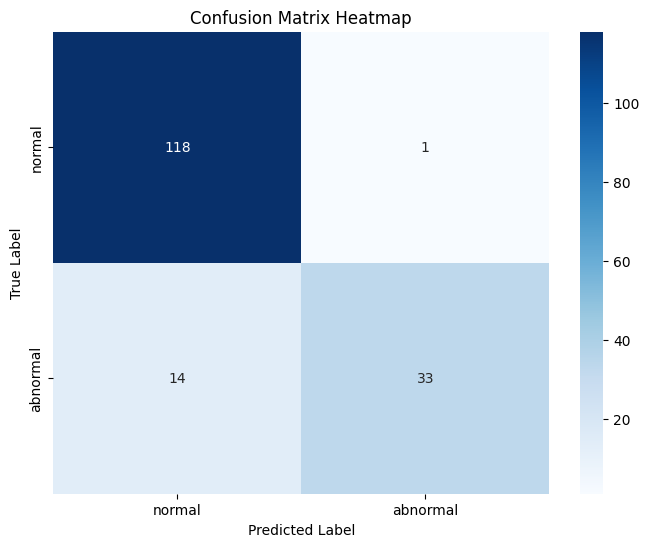

In [87]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['normal', 'abnormal'], yticklabels=['normal', 'abnormal'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix Heatmap')
plt.show()

# Lab week8 

In [ ]:
file_name = '/content/drive/MyDrive/DST68/machine-sound-data/test/a_00000011_5000.wav'
audio, sample_rate = librosa.load(file_name, res_type='kaiser_fast')

print(audio.shape, sample_rate)

mfccs = librosa.feature.mfcc(y=audio, sr=sample_rate, n_mfcc=40)
print(mfccs.shape)

(110250,) 22050
(40, 216)


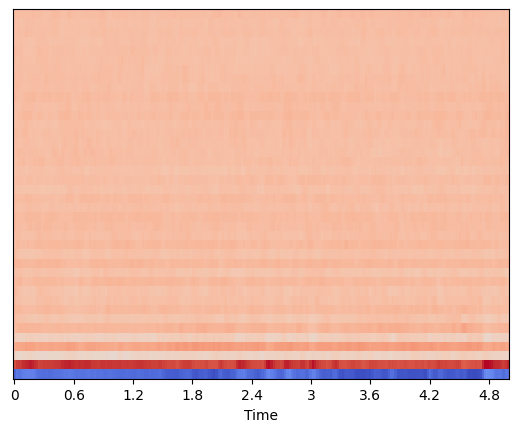

In [92]:
librosa.display.specshow(mfccs, sr=sample_rate, x_axis='time')

In [93]:
max_pad_len = 100

def extract_features(file_name):
    audio, sample_rate = librosa.load(file_name, res_type='kaiser_fast')
    mfccs = librosa.feature.mfcc(y=audio, sr=sample_rate, n_mfcc=40)
    pad_width = max_pad_len - mfccs.shape[1]
    mfccs = np.pad(mfccs, pad_width=((0, 0), (0, max(0, pad_width))), mode='constant')
    return mfccs

In [94]:
normal_train_features = []
for file_name in glob.glob(normal_train):
    data = extract_features(file_name)
    normal_train_features.append(data)

abnormal_train_features = []
for file_name in glob.glob(abnormal_train):
    data = extract_features(file_name)
    abnormal_train_features.append(data)

normal_val_features = []
for file_name in glob.glob(normal_val):
    data = extract_features(file_name)
    normal_val_features.append(data)

abnormal_val_features = []
for file_name in glob.glob(abnormal_val):
    data = extract_features(file_name)
    abnormal_val_features.append(data)

In [95]:
normal_train_features[0].shape

(40, 216)

In [96]:
feature_train_table = np.vstack((normal_train_features, abnormal_train_features))
print(feature_train_table.shape)

(664, 40, 216)


In [97]:
feature_train_table = feature_train_table.reshape(feature_train_table.shape[0], feature_train_table.shape[1], feature_train_table.shape[2], 1)
print(feature_train_table.shape)

(664, 40, 216, 1)


In [98]:
y_train_encoded[:10]

array([[1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.]])

In [99]:
feature_val_table = np.vstack((normal_val_features, abnormal_val_features))

In [100]:
feature_val_table = feature_val_table.reshape(feature_val_table.shape[0], feature_val_table.shape[1], feature_val_table.shape[2], 1)
print(feature_val_table.shape)

(166, 40, 216, 1)


In [101]:
x_train = feature_train_table
x_val = feature_val_table
y_train = y_train_encoded
y_val = y_val_encoded

In [102]:
x_train.shape, x_val.shape, y_train.shape, y_val.shape

((664, 40, 216, 1), (166, 40, 216, 1), (664, 2), (166, 2))

In [103]:
num_rows = 40
num_columns = 216
num_channels = 1
num_batch_size = 64
epochs = 50

In [104]:
model = Sequential()
model.add(Input(shape=(num_rows, num_columns, num_channels)))
model.add(Conv2D(filters=16, kernel_size=2, activation='relu'))
model.add(MaxPooling2D(pool_size=2))
model.add(Dropout(0.2))

model.add(Conv2D(filters=32, kernel_size=2, activation='relu'))
model.add(MaxPooling2D(pool_size=2))
model.add(Dropout(0.2))

model.add(Conv2D(filters=64, kernel_size=2, activation='relu'))
model.add(MaxPooling2D(pool_size=2))
model.add(Dropout(0.2))

model.add(Conv2D(filters=128, kernel_size=2, activation='relu'))
model.add(MaxPooling2D(pool_size=2))
model.add(Dropout(0.2))
model.add(GlobalAveragePooling2D())

model.add(Dense(2, activation='softmax'))

In [105]:
model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer='adam')

In [106]:
from tensorflow.keras.callbacks import ModelCheckpoint

checkpoint = ModelCheckpoint('best_model.keras', monitor='val_loss', verbose=1, save_best_only=True, mode='min')

In [107]:
his = model.fit(x_train, y_train, batch_size=num_batch_size, epochs=epochs, validation_data=(x_val, y_val), verbose=1, callbacks=[checkpoint])

Epoch 1/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 421ms/step - accuracy: 0.6276 - loss: 8.6380
Epoch 1: val_loss improved from inf to 1.24172, saving model to best_model.keras
11/11 ━━━━━━━━━━━━━━━━━━━━ 12s 567ms/step - accuracy: 0.6267 - loss: 8.4522 - val_accuracy: 0.3133 - val_loss: 1.2417
Epoch 2/50
 9/11 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.6519 - loss: 2.4052
Epoch 2: val_loss did not improve from 1.24172
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.6528 - loss: 2.2054 - val_accuracy: 0.2952 - val_loss: 1.3153
Epoch 3/50
 9/11 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.7478 - loss: 0.8334
Epoch 3: val_loss improved from 1.24172 to 1.21442, saving model to best_model.keras
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - accuracy: 0.7359 - loss: 0.8386 - val_accuracy: 0.2892 - val_loss: 1.2144
Epoch 4/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.7046 - loss: 0.6816
Epoch 4: val_loss improved from 1.21442 to 0.74315, saving model to best_model.keras
11/11 ━━━━━

In [108]:
h1 = go.Scatter(y=his.history['loss'],
                    mode="lines", line=dict(
                    width=2,
                    color='blue'),
                    name="loss"
                   )
h2 = go.Scatter(y=his.history['val_loss'],
                    mode="lines", line=dict(
                    width=2,
                    color='red'),
                    name="val_loss"
                   )

data = [h1,h2]
layout1 = go.Layout(title='Loss',
                   xaxis=dict(title='epochs'),
                   yaxis=dict(title=''))
fig1 = go.Figure(data = data, layout=layout1)
fig1.show()

In [109]:
h1 = go.Scatter(y=his.history['accuracy'],
                    mode="lines", line=dict(
                    width=2,
                    color='blue'),
                    name="acc"
                   )
h2 = go.Scatter(y=his.history['val_accuracy'],
                    mode="lines", line=dict(
                    width=2,
                    color='red'),
                    name="val_acc"
                   )

data = [h1,h2]
layout1 = go.Layout(title='Accuracy',
                   xaxis=dict(title='epochs'),
                   yaxis=dict(title=''))
fig2 = go.Figure(data = data, layout=layout1)
fig2.show()

In [110]:
from tensorflow import keras

model = keras.models.load_model("/content/best_model.keras")

In [111]:
train_res = model.evaluate(x_train, y_train, verbose=0, return_dict=True)
val_res   = model.evaluate(x_val,   y_val,   verbose=0, return_dict=True)

acc_key = next(k for k in train_res.keys() if k in
               ('accuracy', 'binary_accuracy', 'categorical_accuracy',
                'sparse_categorical_accuracy'))

print(f"Training  - loss: {train_res['loss']:.4f}, acc: {train_res[acc_key]:.4f}")
print(f"Validation- loss: {val_res['loss']:.4f}, acc: {val_res[acc_key]:.4f}")


Training  - loss: 0.2345, acc: 0.9232
Validation- loss: 0.2422, acc: 0.9217


In [112]:
from sklearn.metrics import confusion_matrix, classification_report
import numpy as np

y_pred = model.predict(x_val)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true_classes = np.argmax(y_val, axis=1)

6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 108ms/step


In [113]:
cm = confusion_matrix(y_true_classes, y_pred_classes)
print("Confusion Matrix:")
print(cm)

Confusion Matrix:
[[119   0]
 [ 13  34]]


In [114]:
report = classification_report(y_true_classes, y_pred_classes, target_names=['normal', 'abnormal'],digits=4)
print("\nClassification Report:")
print(report)


Classification Report:
              precision    recall  f1-score   support

      normal     0.9015    1.0000    0.9482       119
    abnormal     1.0000    0.7234    0.8395        47

    accuracy                         0.9217       166
   macro avg     0.9508    0.8617    0.8939       166
weighted avg     0.9294    0.9217    0.9174       166



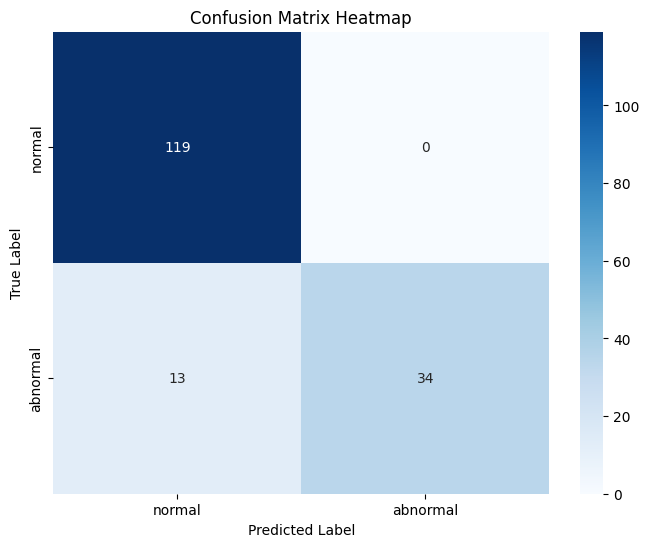

In [115]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['normal', 'abnormal'], yticklabels=['normal', 'abnormal'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix Heatmap')
plt.show()